In [1]:
import pytraj as pt
import mdtraj as md
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import prolif
%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/cbouy/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Trajectory

In [2]:
# load traj
traj = pt.load(
    "/nfs/jeroboam/xiao/mGluR5/analysis/traj/wt-DFB.nc", 
    top="/nfs/jeroboam/xiao/mGluR5/analysis/topology/wt-DFB.prmtop",
)
traj.strip(':WAT,PA,PC,OL,Cl-')
traj

pytraj.Trajectory, 850 frames: 
Size: 0.081791 (GB)
<Topology: 4305 atoms, 268 residues, 2 mols, PBC with box type = ortho>
           

In [3]:
" ".join([r.name+str(r.index) for r in traj.topology.residues])

'ACE0 ILE1 PRO2 VAL3 GLN4 TYR5 LEU6 ARG7 TRP8 GLY9 ASP10 PRO11 GLU12 PRO13 ILE14 ALA15 ALA16 VAL17 VAL18 PHE19 ALA20 CYS21 LEU22 GLY23 LEU24 LEU25 ALA26 THR27 LEU28 PHE29 VAL30 THR31 VAL32 ILE33 PHE34 ILE35 ILE36 TYR37 ARG38 ASP39 THR40 PRO41 VAL42 VAL43 LYS44 SER45 SER46 SER47 ARG48 GLU49 LEU50 CYS51 TYR52 ILE53 ILE54 LEU55 ALA56 GLY57 ILE58 CYS59 LEU60 GLY61 TYR62 LEU63 CYS64 THR65 PHE66 CYS67 LEU68 ILE69 ALA70 LYS71 PRO72 LYS73 GLN74 ILE75 TYR76 CYX77 TYR78 LEU79 GLN80 ARG81 ILE82 GLY83 ILE84 GLY85 LEU86 SER87 PRO88 ALA89 MET90 SER91 TYR92 SER93 ALA94 LEU95 VAL96 THR97 LYS98 THR99 ASN100 ARG101 ILE102 ALA103 ARG104 ILE105 LEU106 ALA107 GLY108 SER109 LYS110 LYS111 LYS112 ILE113 CYS114 THR115 LYS116 LYS117 PRO118 ARG119 PHE120 MET121 SER122 ALA123 CYS124 ALA125 GLN126 LEU127 VAL128 ILE129 ALA130 PHE131 ILE132 LEU133 ILE134 CYS135 ILE136 GLN137 LEU138 GLY139 ILE140 ILE141 VAL142 ALA143 LEU144 PHE145 ILE146 MET147 GLU148 PRO149 PRO150 ASP151 ILE152 MET153 HIP154 ASP155 TYR156 PRO157 SER

In [4]:
# only read protein residues and ligand
traj = traj[":1-265,LIG"]
# align
traj.center(":1-265")
traj

pytraj.Trajectory, 850 frames: 
Size: 0.081411 (GB)
<Topology: 4285 atoms, 266 residues, 2 mols, PBC with box type = ortho>
           

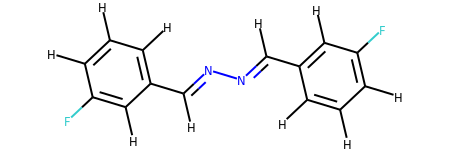

In [5]:
# split in ligand and protein trajectories

lig_traj = prolif.Ligand.from_pytraj(traj[":LIG"])
prot_traj = prolif.Protein.from_pytraj(traj[":1-265"])
lig_traj

In [6]:
# define interactions and dataframe
ff = prolif.FingerprintFactory(interactions=[
    'HBacceptor', 'XBdonor', 'PiCation', 'FaceToFace', 'EdgeToFace', 'Hydrophobic'
])
df = prolif.Dataframe()
df.configure(ff)
ff

<prolif.fingerprint.FingerprintFactory: 6 interactions: ['HBacceptor', 'XBdonor', 'PiCation', 'FaceToFace', 'EdgeToFace', 'Hydrophobic'] at 0x7fe6384f4390>

In [7]:
for i in range(lig_traj.n_frames):
    print("%3d\r"%i, end='')
    prot_traj.detect_pocket_residues(lig_traj, frame=i)
    df.generate_ifp(lig_traj.get_frame(i), prot_traj.get_frame(i))
ifp = df.copy()
ifp.postprocess()

In [8]:
pocket_residues = ifp.get_pocket_residues()
ifp

Ligand name Ligand frame Ligand residue Protein name Protein frame  \
                                                                         
0        ligand            0           LIG0      protein             0   
1        ligand            1           LIG0      protein             1   
2        ligand            2           LIG0      protein             2   
3        ligand            3           LIG0      protein             3   
4        ligand            4           LIG0      protein             4   
..          ...          ...            ...          ...           ...   
845      ligand          845           LIG0      protein           845   
846      ligand          846           LIG0      protein           846   
847      ligand          847           LIG0      protein           847   
848      ligand          848           LIG0      protein           848   
849      ligand          849           LIG0      protein           849   

         ILE54                                         ...   MET250  \
    HBacceptor XBdonor PiCation FaceToFace EdgeToFace  ... PiCation   
0            0       0        0          0          0  ...        0   
1            0       0        0          0          0  ...        0   
2            0       0        0          0          0  ...        0   
3            0       0        0          0          0  ...        0   
4            0       0        0          0          0  ...        0   
..         ...     ...      ...        ...        ...  ...      ...   
845          0       0        0          0          0  ...        0   
846          0       0        0          0          0  ...        0   
847          0       0        0          0          0  ...        0   
848          0       0        0          0          0  ...        0   
849          0       0        0          0          0  ...        0   

                                          PHE251                              \
    FaceToFace EdgeToFace Hydrophobic HBacceptor XBdonor PiCation FaceToFace   
0            0          0           0          0       0        0          0   
1            0          0           0          0       0        0          0   
2            0          0           0          0       0        0          0   
3            0          0           0          0       0        0          0   
4            0          0           1          0       0        0          0   
..         ...        ...         ...        ...     ...      ...        ...   
845          0          0           0          0       0        0          0   
846          0          0           0          0       0        0          0   
847          0          0           0          0       0        0          0   
848          0          0           0          0       0        0          0   
849          0          0           0          0       0        0          0   

                            
    EdgeToFace Hydrophobic  
0            0           0  
1            0           0  
2            0           0  
3            0           0  
4            0           0  
..         ...         ...  
845          0           0  
846          0           0  
847          0           0  
848          0           0  
849          0           0  

[850 rows x 389 columns]

Removed ASN180, CYS249, GLY83, GLY85, ILE184, ILE207, LEU68, PHE251 - present in less than 1% of interactions


/home/cbouy/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


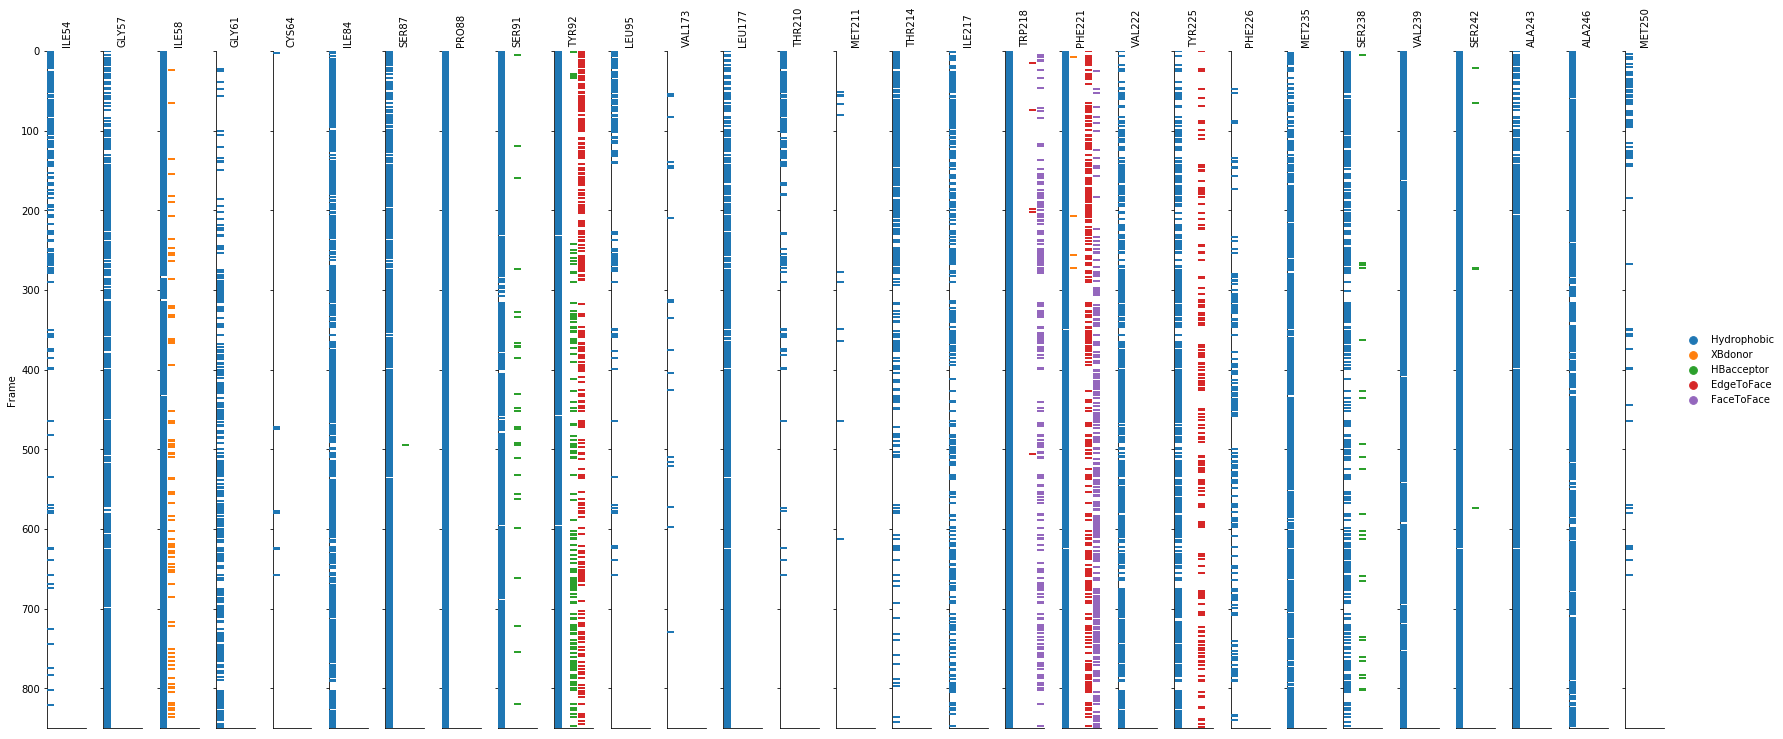

In [10]:
# plot

data = pd.melt(ifp, id_vars=ifp.id_columns, var_name=["residue","interaction"])
data = data[data["value"] != 0]
data.reset_index(inplace=True, drop=True)
data.drop(columns=["Ligand name","Ligand residue","Protein name","Protein frame"], inplace=True)
data.rename(columns={"Ligand frame":"Frame"}, inplace=True)
# remove residues appearing less than 1% of the time
t = data.groupby(["residue","interaction"], as_index=False).agg({"value":"count"}).groupby("residue", as_index=False).agg({"value":"max"})
threshold = int(0.01*(data.Frame.max()+1))
todrop = t.loc[t["value"] < threshold].residue.tolist()
data = data[~data["residue"].isin(todrop)]
print("Removed", ", ".join(todrop), "- present in less than 1% of interactions")

# plot
sns.set_context(font_scale=1.3)
g = sns.catplot(
    data=data, x="interaction", y="Frame", hue="interaction", col="residue",
    height=10, aspect=0.08, jitter=0, sharex=False, marker="_", s=7, linewidth=2,
)
g.set_titles("{col_name}", rotation=90)
g.set(xticks=[], ylim=(0,data.Frame.max()+1))
g.set_xticklabels([])
g.set_xlabels("")
g.add_legend()
for ax in g.axes.flat:
    ax.invert_yaxis()
plt.savefig("interaction_plot.png", dpi=300, bbox_inches='tight')

Removed ASN180, CYS249, GLY83, GLY85, ILE184, ILE207, LEU68, PHE251 - interacting with the ligand in less than 1.0% of frames (8/850 frames)


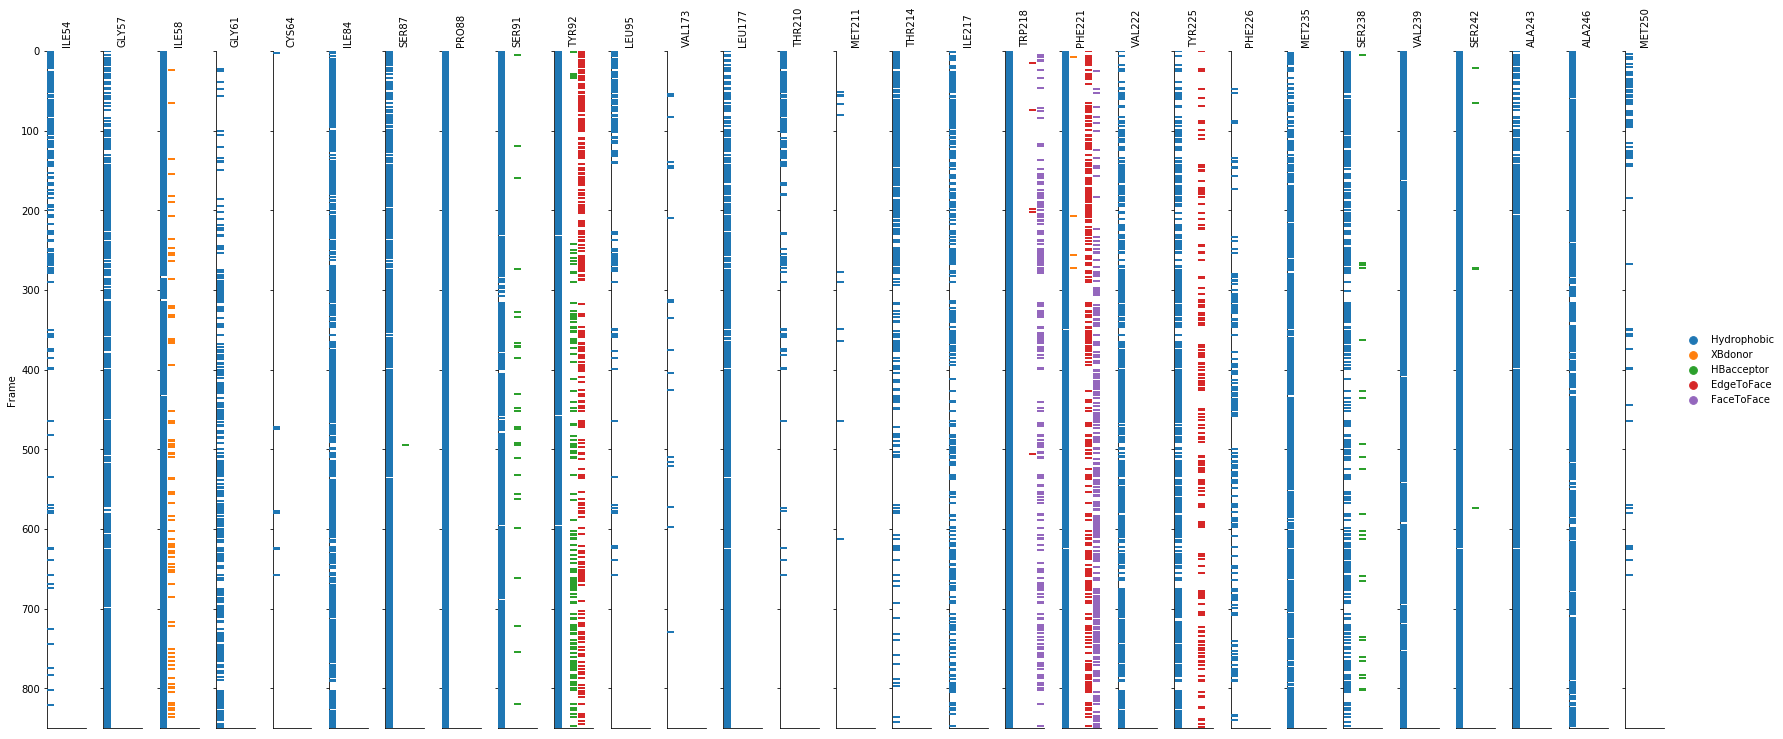

In [21]:
ifp.plot_ifp()

In [11]:
from math import pi
from bokeh.io import show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource, FactorRange, HoverTool, Legend, FixedTicker

In [12]:
# interactive plot
output_notebook()

data_bokeh = data.drop(columns="value").copy()
interactions = data_bokeh.interaction.unique()
colors = Category10.get(len(interactions))
residues = data_bokeh.residue.unique()
x_range = [(residue, interaction) for residue in residues for interaction in interactions]

renderers = []
legend_items = []
p = figure(x_range=FactorRange(*x_range), plot_width=900, plot_height=1800)
for i, (interaction, color) in enumerate(zip(interactions, colors)):
    d = data_bokeh.loc[data_bokeh["interaction"]==interaction]
    x = [(r,i) for r in d.residue]
    y = d["Frame"]
    r = p.dash(
        x=x, y=y, color=color,
        line_width=2, size=5, alpha=0.7, hover_alpha=1.0,
    )
    #renderers.append(r)
    legend_items.append((interaction,[r]))

p.add_tools(HoverTool(
    tooltips=[("Frame","@y")], mode='hline',
    #tooltips=None, renderers=renderers, mode='hline'
))
p.y_range.start = -1
p.y_range.end = data_bokeh.Frame.max()+1

p.ygrid.visible = False
p.xgrid.grid_line_alpha = 0.5
p.xgrid.ticker = p.xaxis[0].ticker
p.xaxis.group_label_orientation = pi/2
p.xaxis.major_label_text_color = None

p.add_layout(Legend(items=legend_items, click_policy="hide"), 'right')

show(p)

Loading BokehJS ...

In [13]:
tc = ifp.get_tanimoto(0)
tc

,Ligand name,Ligand frame,Ligand residue,Protein name,Protein frame,Tanimoto
0,ligand,0,LIG0,protein,0,1.000000
1,ligand,1,LIG0,protein,1,0.360000
2,ligand,2,LIG0,protein,2,0.375000
3,ligand,3,LIG0,protein,3,0.360000
4,ligand,4,LIG0,protein,4,0.320000
...,...,...,...,...,...,...
845,ligand,845,LIG0,protein,845,0.590909
846,ligand,846,LIG0,protein,846,0.545455
847,ligand,847,LIG0,protein,847,0.521739
848,ligand,848,LIG0,protein,848,0.714286


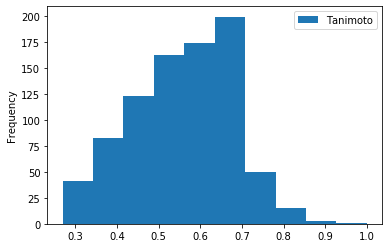

In [14]:
tc.plot(kind='hist', y="Tanimoto")

In [15]:
data, centroids = ifp.kmeans_clustering(3)
data = data.sort_values(["Cluster","Ligand frame"]).reset_index(drop=True).reset_index()
data

Frames closest to centroids:
cluster 0: 420, cluster 1: 373, cluster 2: 11


/home/cbouy/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index Ligand name Ligand frame Ligand residue Protein name Protein frame  \
                                                                               
0       0      ligand            0           LIG0      protein             0   
1       1      ligand            7           LIG0      protein             7   
2       2      ligand           18           LIG0      protein            18   
3       3      ligand           23           LIG0      protein            23   
4       4      ligand           25           LIG0      protein            25   
..    ...         ...          ...            ...          ...           ...   
845   845      ligand          621           LIG0      protein           621   
846   846      ligand          624           LIG0      protein           624   
847   847      ligand          625           LIG0      protein           625   
848   848      ligand          639           LIG0      protein           639   
849   849      ligand          658           LIG0      protein           658   

    Cluster      ILE54                   ...   MET250                        \
            HBacceptor XBdonor PiCation  ... PiCation FaceToFace EdgeToFace   
0         0          0       0        0  ...        0          0          0   
1         0          0       0        0  ...        0          0          0   
2         0          0       0        0  ...        0          0          0   
3         0          0       0        0  ...        0          0          0   
4         0          0       0        0  ...        0          0          0   
..      ...        ...     ...      ...  ...      ...        ...        ...   
845       2          0       0        0  ...        0          0          0   
846       2          0       0        0  ...        0          0          0   
847       2          0       0        0  ...        0          0          0   
848       2          0       0        0  ...        0          0          0   
849       2          0       0        0  ...        0          0          0   

                    PHE251                                                     
    Hydrophobic HBacceptor XBdonor PiCation FaceToFace EdgeToFace Hydrophobic  
0             0          0       0        0          0          0           0  
1             0          0       0        0          0          0           0  
2             0          0       0        0          0          0           0  
3             0          0       0        0          0          0           0  
4             0          0       0        0          0          0           0  
..          ...        ...     ...      ...        ...        ...         ...  
845           1          0       0        0          0          0           0  
846           1          0       0        0          0          0           0  
847           1          0       0        0          0          0           0  
848           1          0       0        0          0          0           0  
849           1          0       0        0          0          0           0  

[850 rows x 391 columns]

Removed ASN180, CYS249, CYS64, GLY83, GLY85, ILE184, ILE207, LEU68, LEU95, MET211, MET250, PHE226, PHE251, THR210, VAL173 - present in less than 1% of interactions


/home/cbouy/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


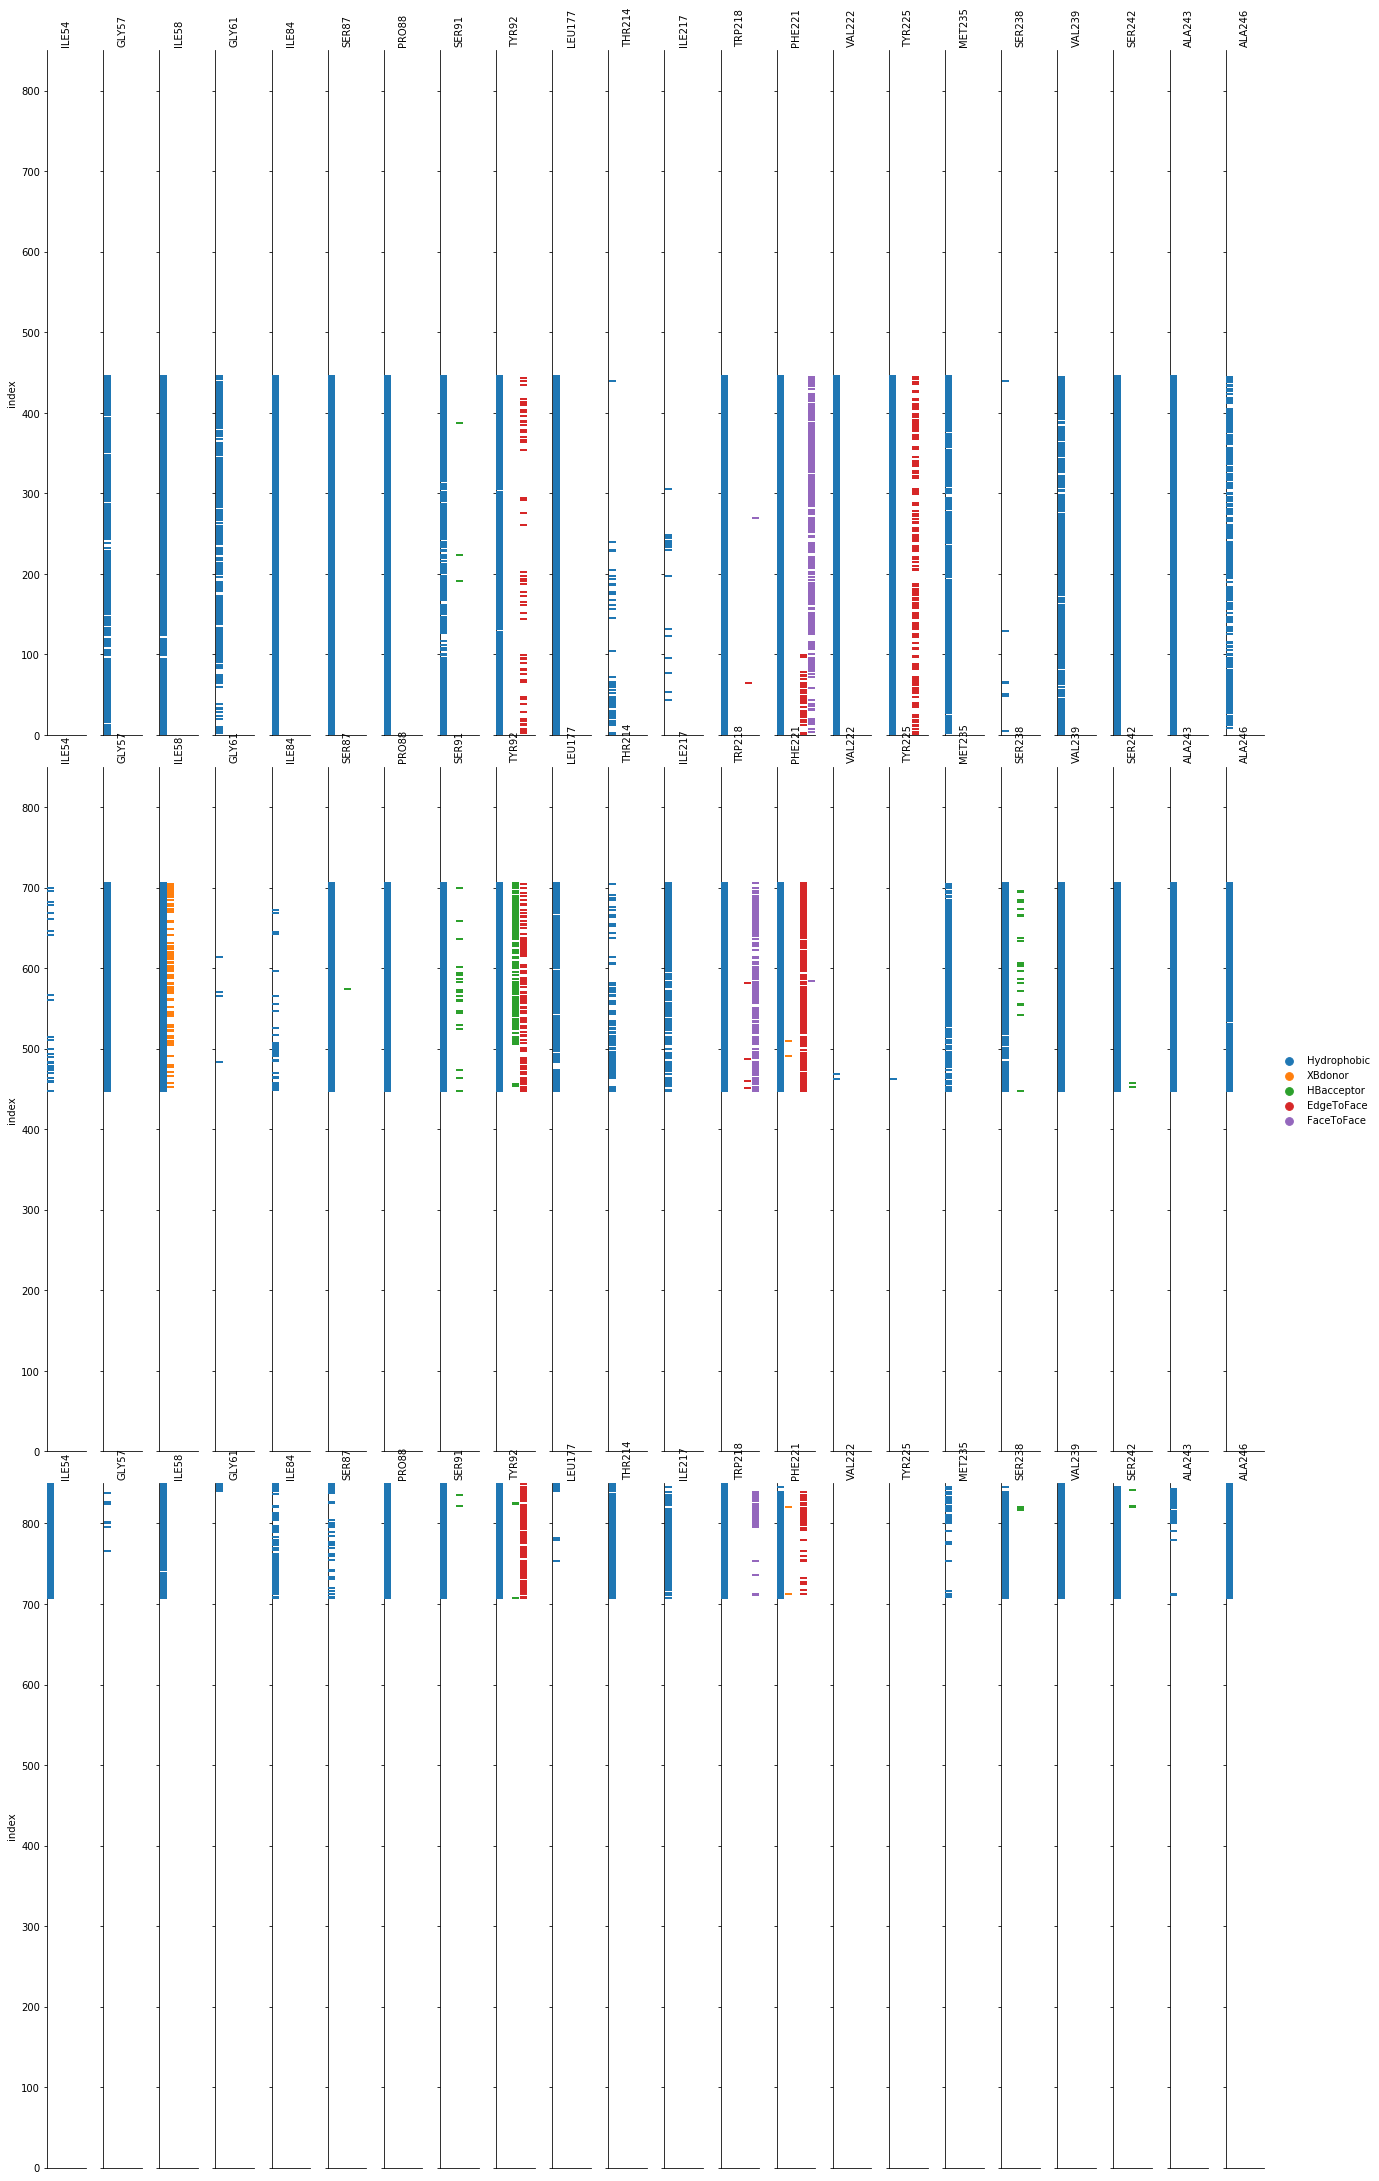

In [16]:
# plot

# rearange
data = pd.melt(data, id_vars=ifp.id_columns+["index","Cluster"], var_name=["residue","interaction"])
data = data[data["value"] != 0]
data.reset_index(inplace=True, drop=True)

# remove residues appearing less than 1% of the time
t = data.groupby(["residue","interaction"], as_index=False).agg({"value":"count"}).groupby("residue", as_index=False).agg({"value":"max"})
threshold = int(0.01*(data.index.max()+1))
todrop = t.loc[t["value"] < threshold].residue.tolist()
data = data[~data["residue"].isin(todrop)]
print("Removed", ", ".join(todrop), "- present in less than 1% of interactions")

# plot
sns.set_context(font_scale=1.3)
g = sns.catplot(
    data=data, x="interaction", y="index", hue="interaction", col="residue", row="Cluster",
    height=10, aspect=0.08, jitter=0, sharex=False, marker="_", s=7, linewidth=2,
)
g.set_titles("{col_name}", rotation=90)
g.set(xticks=[], ylim=(0,data["Ligand frame"].max()+1))
g.set_xticklabels([])
g.set_xlabels("")
g.add_legend()

# PDBQT

In [2]:
lig = prolif.Ligand.from_pdbqt("/data/backup/cicada/cbouysset/workspace/bitter/old.t2r16/docking/output/5JQH/T2R16_HUMAN.B99990041/ligand_001/docking_poses.pdbqt")
rec = Chem.MolFromPDBFile("/nfs/jeroboam/cedric/bitter/t2r16/structures/5JQH/T2R16_HUMAN.B99990041.pdb", removeHs=False)
rec = prolif.Protein.from_rdkit(rec, reference=lig)
ff = prolif.FingerprintFactory()
print(ff.interactions.keys())
ff.rules

odict_keys(['HBdonor', 'HBacceptor', 'Cation', 'Anion', 'PiStacking', 'Hydrophobic'])


{'HBond': {'donor': '[O,N,S]-[H]',
  'acceptor': '[O,N,F,*-;!+]',
  'distance': 3.0,
  'angle': [0.0, 0.8726646259971648]},
 'XBond': {'donor': '[#6,#7,Si,F,Cl,Br,I][F,Cl,Br,I,At]',
  'acceptor': '[F-,Cl-,Br-,I-,#7,O,P,S,Se,Te,a&R;!+][*]',
  'distance': 3.2,
  'angle': {'AXD': [2.792526803190927, 3.141592653589793],
   'XAR': [1.5707963267948966, 2.2689280275926285]}},
 'Ionic': {'cation': '[*+]', 'anion': '[*-]', 'distance': 5.0},
 'Aromatic': {'smarts': ['[a]1:[a]:[a]:[a]:[a]:[a]:1',
   '[a]1:[a]:[a]:[a]:[a]:1'],
  'FaceToFace': {'angle': [0.0, 0.5235987755982988], 'distance': 4.4},
  'EdgeToFace': {'angle': [1.0471975511965976, 1.5707963267948966],
   'distance': 5.5}},
 'Cation-Pi': {'distance': 5.0, 'angle': [0.0, 0.5235987755982988]},
 'Hydrophobic': {'smarts': '[#6,S,F,Cl,Br,I;!+;!-]', 'distance': 4.5},
 'Metallic': {'metal': '[Ca,Cd,Co,Cu,Fe,Mg,Mn,Ni,Zn]',
  'ligand': '[O,N,*-;!+]',
  'distance': 2.8}}

In [3]:
df = prolif.Dataframe()
df.configure(ff)
df.generate_ifp(lig.get_frame(), rec.get_frame())
df.curate()
df

Ligand name Ligand frame Ligand residue Protein name Protein frame   ASN89  \
                                                                     HBdonor   
0  trajectory            0           UNL0      protein             0       0   

                                      ... VAL265                               \
  HBacceptor Cation Anion PiStacking  ... Cation Anion PiStacking Hydrophobic   
0          0      0     0          0  ...      0     0          0           1   

   TYR266                                                 
  HBdonor HBacceptor Cation Anion PiStacking Hydrophobic  
0       0          0      0     0          0           1  

[1 rows x 107 columns]

In [19]:
df.get_residue("ASN89")

,Ligand name,Ligand frame,Ligand residue,Protein name,Protein frame,HBdonor,HBacceptor,Cation,Anion,PiStacking,Hydrophobic
0,trajectory,0,UNL0,protein,0,0,0,0,0,0,1


In [17]:
df.get_interaction("Hydrophobic")

,Ligand name,Ligand frame,Ligand residue,Protein name,Protein frame,ASN89,ILE90,PHE93,LYS169,GLU171,...,ALA180,HIS181,PHE240,ILE243,LEU244,ILE247,GLU262,ALA263,VAL265,TYR266
0,trajectory,0,UNL0,protein,0,1,1,1,0,1,...,1,0,1,1,1,1,1,0,1,1


# Topology tests

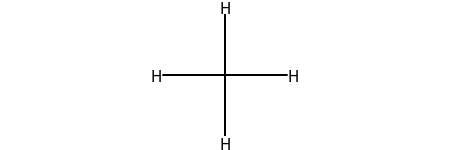

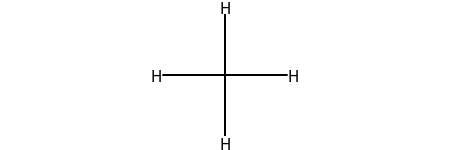

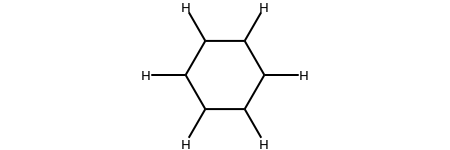

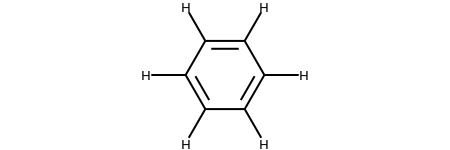

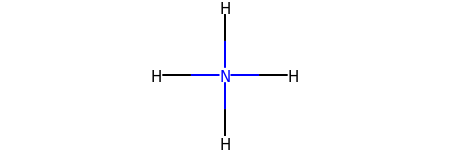

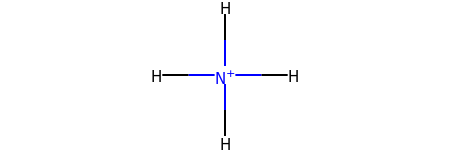

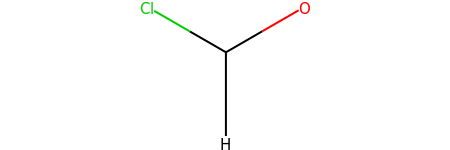

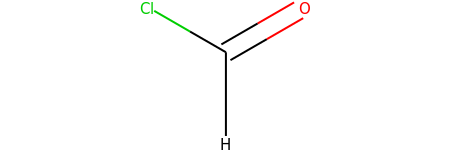

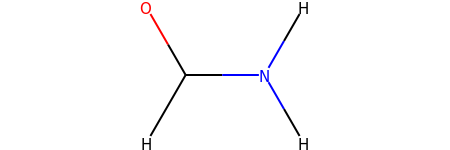

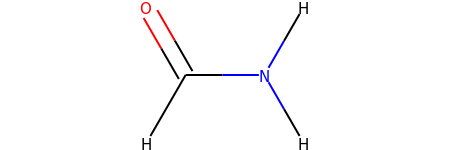

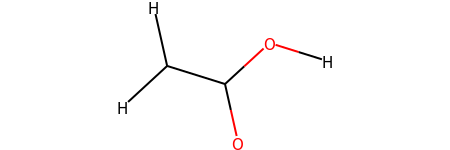

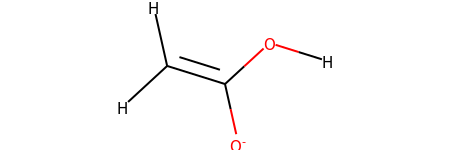

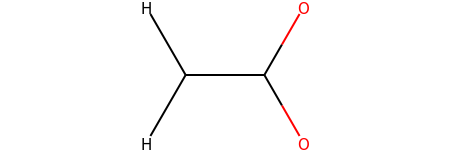

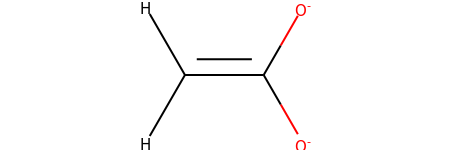

RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 161 in file /opt/conda/conda-bld/rdkit_1561471048963/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [12:50:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 161 in file /opt/conda/conda-bld/rdkit_1561471048963/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [12:50:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 161 in file /opt/conda/conda-bld/rdkit_1561471048963/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_expl

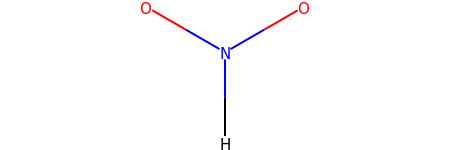

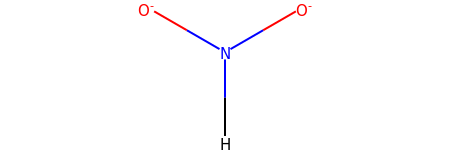

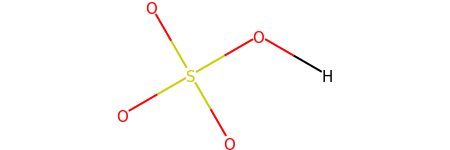

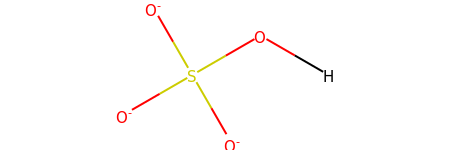

In [100]:
tests = [
    "[C](-[H])(-[H])(-[H])-[H]",
    "[C]1(-[H])-[C](-[H])-[C](-[H])-[C](-[H])-[C](-[H])-[C]1(-[H])",
    "[N](-[H])(-[H])(-[H])-[H]",
    "[Cl]-[C](-[H])-[O]",
    "[H]-[C](-[O])-[N](-[H])-[H]",
    "[H]-[C](-[H])-[C](-[O][H])-[O]",
    "[H]-[C](-[H])-[C](-[O])-[O]",
    "[O]-[N](-[O])-[H]",
    "[O]-[S](-[O])(-[O])-[O]-[H]"
]
for s in tests:
    mol = Chem.RWMol(Chem.MolFromSmiles(s, sanitize=False))
    display(mol)
    prolif.utils.update_bonds_and_charges(mol)
    display(mol)